## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 4 Implement and solve KNN regression:
> (a) Implement a KNN regression algorithm:

>> (i) Find the K nearest neighbours using a suitable distance metric (e.g. Euclidean). Compute the predicted response as the mean of the K neighbours.



In [3]:
def knn(K, X, n):
    yhat = np.zeros(n)
    distances = np.zeros(n)
    # For each obs, compare distance to all other points in X
    for i in range(n):
        for j in range(n):
            distances[j] = distance.euclidean(X[i,:], X[j, :])

        # Sort all the distances
        idx = np.argsort(distances)[1:(K + 1)] # Skip first, as distance to "itself" does not make sense

        yhat[i] = np.mean(y[idx]) # Final value is mean of nearest neighbors
        
    return yhat

K = 5 # number of neighbours
yhat = knn(K, X, n)
mse = np.mean((y-yhat) ** 2)
# test implementation
print(f'MSE value for K = {K} is: {mse}')

MSE value for K = 5 is: 0.6182202180421111


>> (ii) Optional: Compute weights for the neighbours as the proportion of its distance to the total distance for the K nearest neighbours and Compute the predicted response as the (weighted) mean of the K neighbours.

In [4]:
def weighted_knn(K, X, n):
    yhat = np.zeros(n)
    distances = np.zeros(n)
    # For each obs, compare distance to all other points in X
    for i in range(n):
        for j in range(n):
            distances[j] = distance.euclidean(X[i,:], X[j, :])

        # Sort all the distances
        idx = np.argsort(distances)[1:(K + 1)] # Skip first, as distance to "itself" does not make sense
        Wt = sum(distances[idx]) # Weight of k nearest neighbors
        W = distances[idx] / Wt # Weighing average


        yhat[i] = np.matmul(W.T, y[idx]) # Final value is weighted combination of neighbours
    
    return yhat

K = 5 # number of neighbours
yhat = weighted_knn(K, X, n)
mse = np.mean((y-yhat) ** 2)
# test implementation
print(f'MSE value for K = {K} is: {mse}')

MSE value for K = 5 is: 0.6259857090310114


> (b) Find a solution to the diabetes data using KNN regression. Try different options for K.

MSE value for K = 1 is: 0.9906281304299507
MSE value for K = 2 is: 0.7398431386613016
MSE value for K = 3 is: 0.6850853168637211
MSE value for K = 4 is: 0.6158572394178363
MSE value for K = 5 is: 0.6182202180421111
MSE value for K = 6 is: 0.5992118132856249
MSE value for K = 7 is: 0.5863501627559116
MSE value for K = 8 is: 0.5767130272153445
MSE value for K = 9 is: 0.5700935840861078
MSE value for K = 10 is: 0.5654832300943246
MSE value for K = 11 is: 0.5680279732715863
MSE value for K = 12 is: 0.5602706504533235
MSE value for K = 13 is: 0.5599403804049441
MSE value for K = 14 is: 0.552628647875982
MSE value for K = 15 is: 0.5545890702335298
MSE value for K = 16 is: 0.5497053102979395
MSE value for K = 17 is: 0.5486242391693184
MSE value for K = 18 is: 0.5399400684876451
MSE value for K = 19 is: 0.5408240996325178
MSE value for K = 20 is: 0.543472807951842

K = 18 has the lowest MSE: 0.5399400684876451


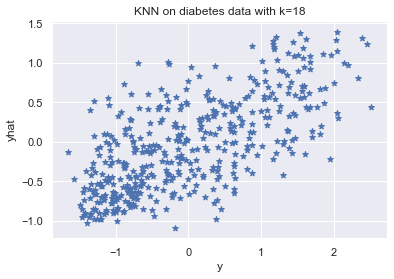

In [5]:
mse_values = [] #to store mse values for different k

for k in range (1,21):
    yhat = knn(k, X, n)
    mse = np.mean((y-yhat) ** 2)
    mse_values.append(mse)
    print(f'MSE value for K = {k} is: {mse}')


k_best = mse_values.index(np.min(mse_values)) + 1
print(f'\nK = {k_best} has the lowest MSE: {np.min(mse_values)}')

yhat = knn(k_best, X, n)
plt.scatter(y, yhat, marker = "*")
plt.xlabel("y")
plt.ylabel("yhat")
plt.title(f'KNN on diabetes data with k={k_best}')
plt.show()